## CMPINF 2100 Week 07 | Review boxplots

Although we will review, we will also discus the LIMITATIONS of boxplots!

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [3]:
gap_df = pd.read_csv( gap_url, sep ='\t' )

In [4]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### Boxplot 

The boxplot is an excellent graphical tool for exploring CONDITIONAL DISTRIBUTIONS or RELATIONSHIPS between categorical and continuous variables.

In Seaborn, it is part of the `sns.catplot()` FIGURE LEVEL function.

The categorical variable is usually associated with the `x` axis and the continuous variable is usually associated with the `y` axis.

The BOXPLOT ssummarizes the CONDITIONAL DISTRIBUTION with SEVERAL summary statistics.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


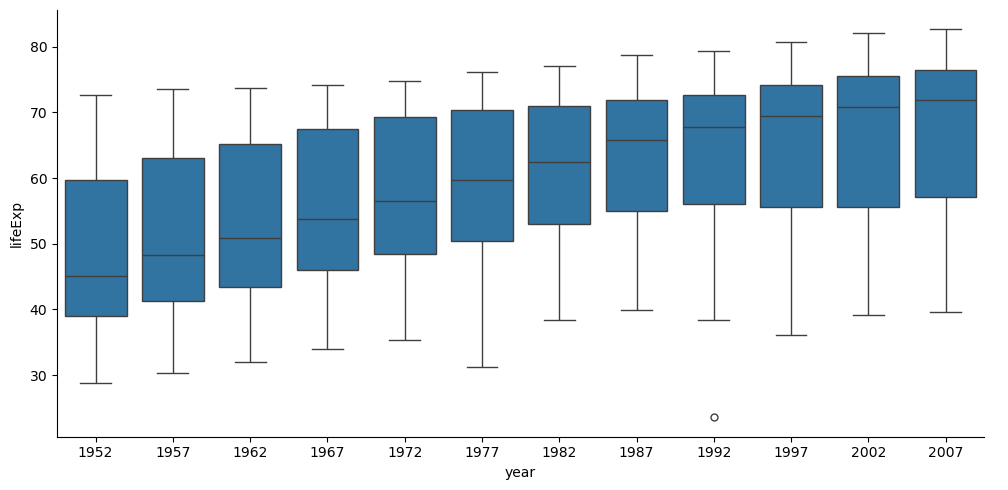

In [5]:
sns.catplot( data = gap_df, x='year', y='lifeExp', kind='box', aspect=2 )

plt.show()

Let's look at the relationship between `continent` and `lifeExp`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


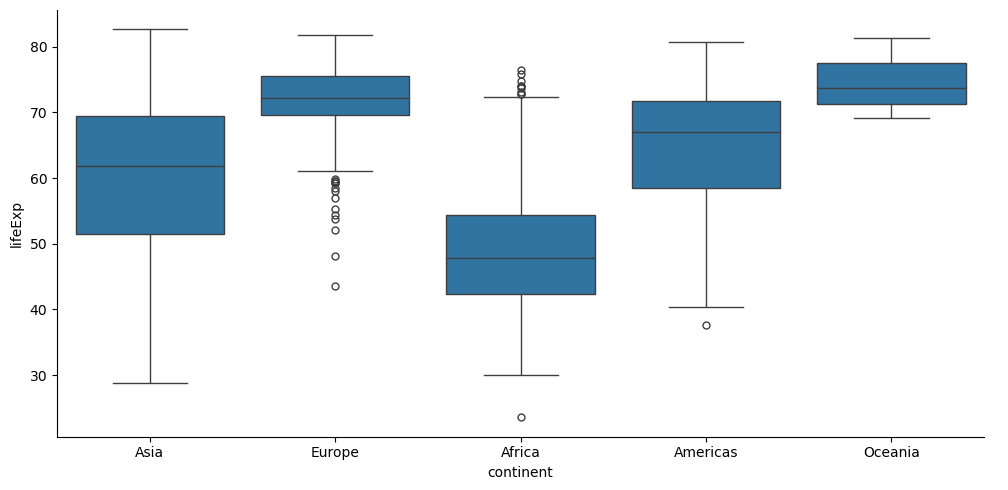

In [6]:
sns.catplot( data = gap_df, x='continent', y='lifeExp', kind='box', aspect=2 )

plt.show()

In summary: Boxplotss allow us to answer several important questions ->

* Does the MEDIAN appear to change across categories?
* Does the VARIATION appear to change across the categories?
* More generally, are the summary statistics different across the categories?

### What is the boxplot best suited for?

A boxplot is at its best when the CONDITIONAL DISTRIBUTION are roughly SYMMETRIC.

That means we MUST check the SHAPE of the conditional distributions!

One way to do that is with FACETED histograms!

Let's return to the CONDITIONAL DISTRIBUTION of `lifeExp` given `year`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


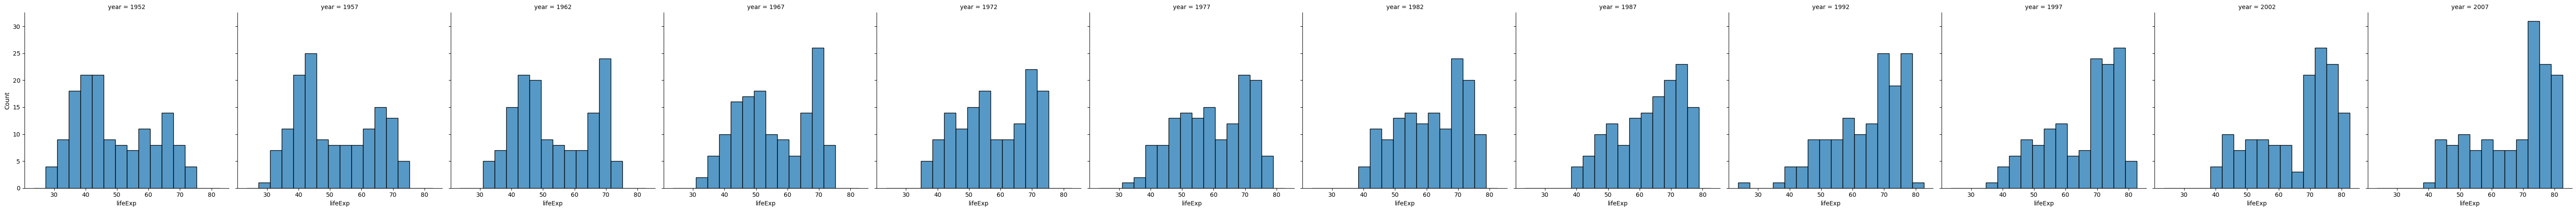

In [7]:
sns.displot( data = gap_df, x='lifeExp', col='year' )

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


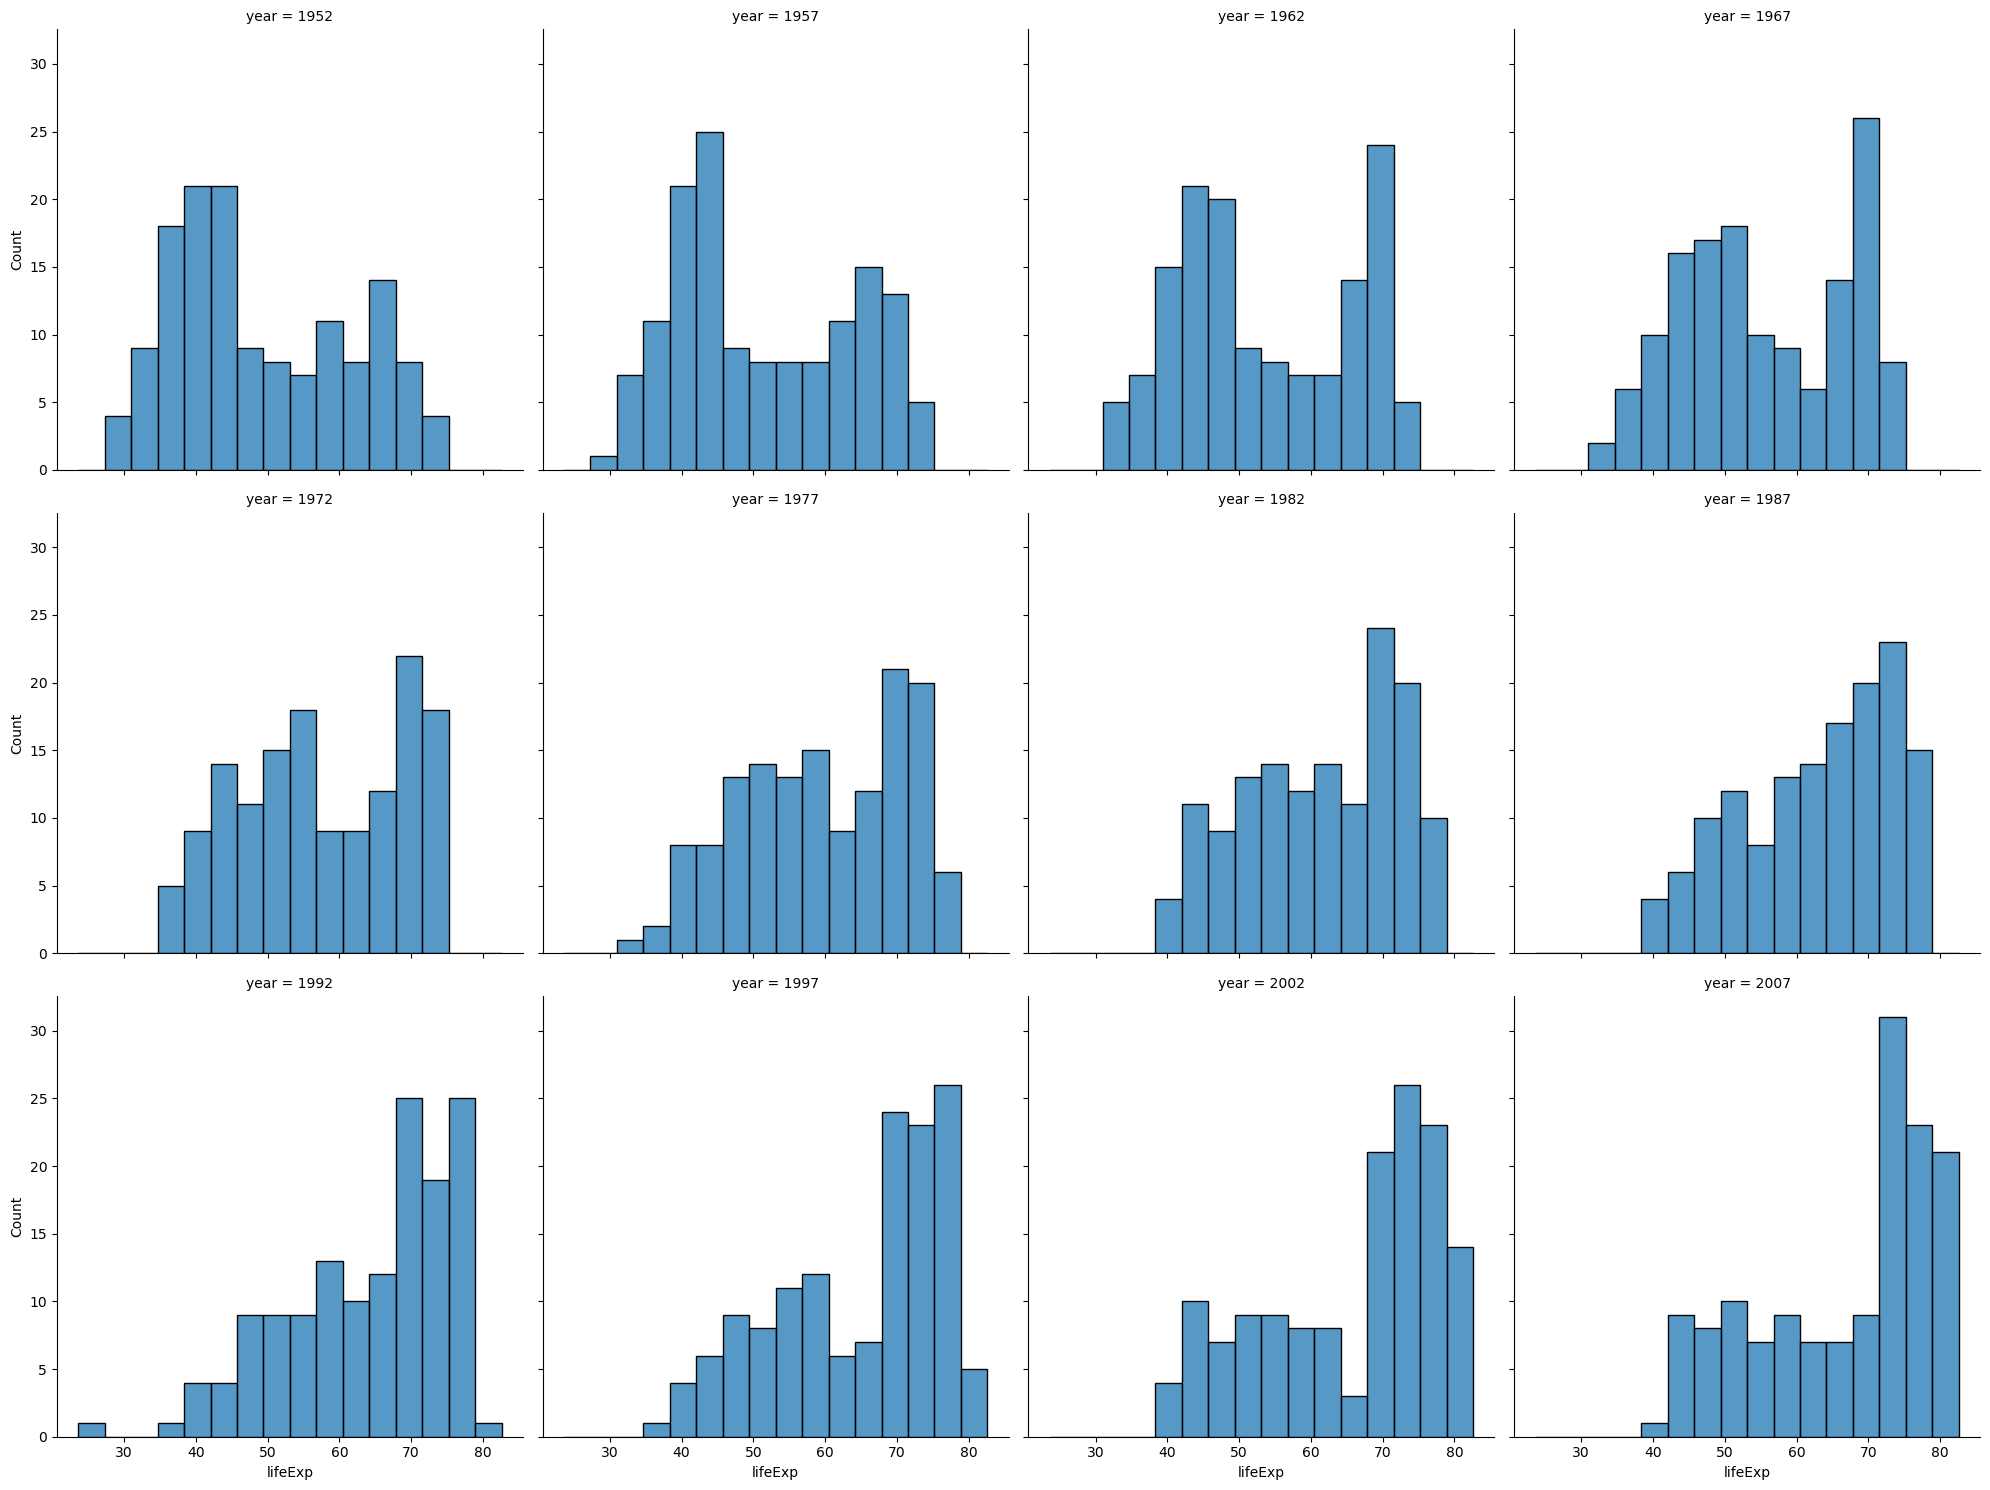

In [8]:
sns.displot( data = gap_df, x='lifeExp', col='year', col_wrap=4 )

plt.show()

None of the facets show EXTREME lack of symetry!

The lack of symetry is referred to as 'SKEW'.

What does EXTREME SKEW look like and what are it's consequences?

Let's load a data set to visualize this issue.

In [9]:
diamonds = sns.load_dataset('diamonds')

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [10]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [12]:
diamonds.dtypes.value_counts()

float64     6
category    1
category    1
category    1
int64       1
Name: count, dtype: int64

In [13]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

The category data type is a SPECIAL data type for CATEGORICAL VARIABLES within Pandas.

In [15]:
diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [16]:
diamonds.color.value_counts(normalize=True)

color
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: proportion, dtype: float64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


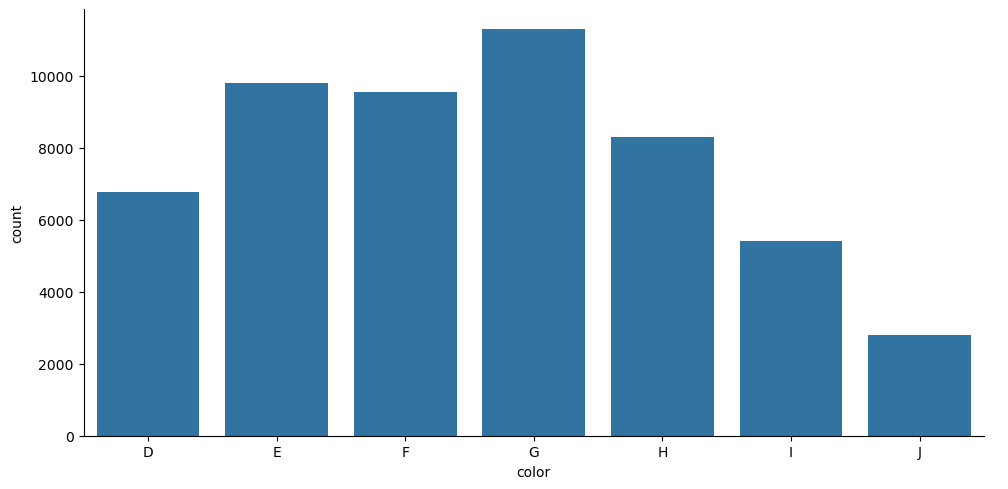

In [17]:
sns.catplot( data = diamonds, x='color', kind='count', aspect=2)

plt.show()

Let's now examine a MARGINAL DISTRIBUTION of the continuous variable `price`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


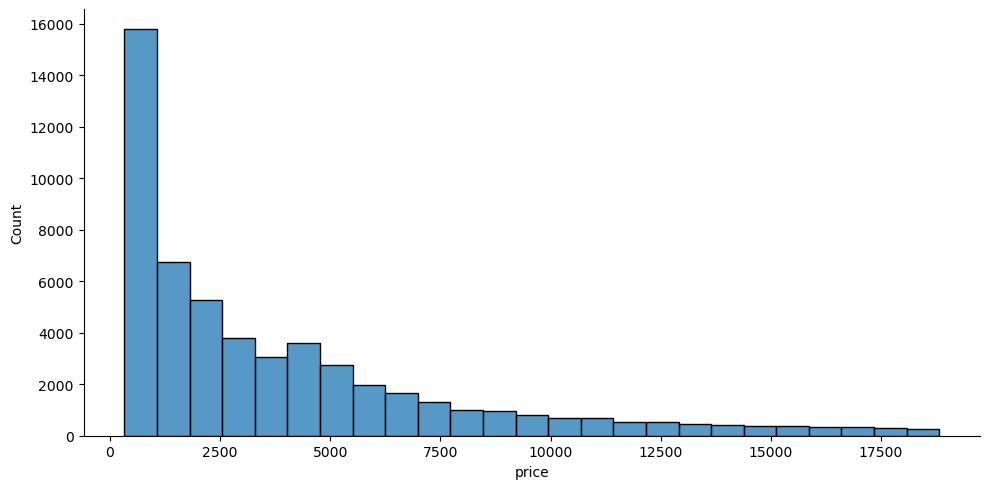

In [18]:
sns.displot(data = diamonds, x='price', bins=25, aspect=2)

plt.show()

Include the KDE on top of the histogram to get a SMOOTHER picture of the distribution.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


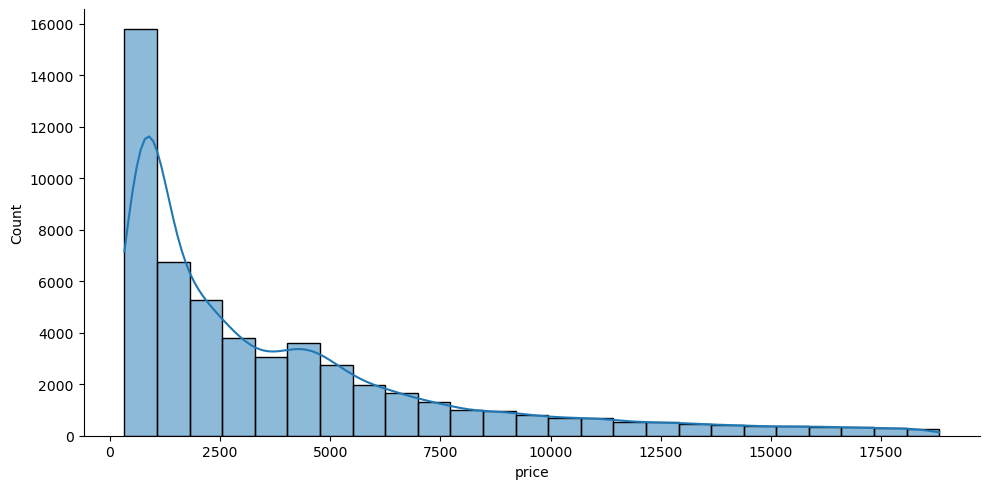

In [20]:
sns.displot(data = diamonds, x='price', bins=25, kde=True, aspect=2)

plt.show()

Let's now examine the CONDITIONAL DISTRIBUTION of `price` given `color`.

We will visualize the categories via facets.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


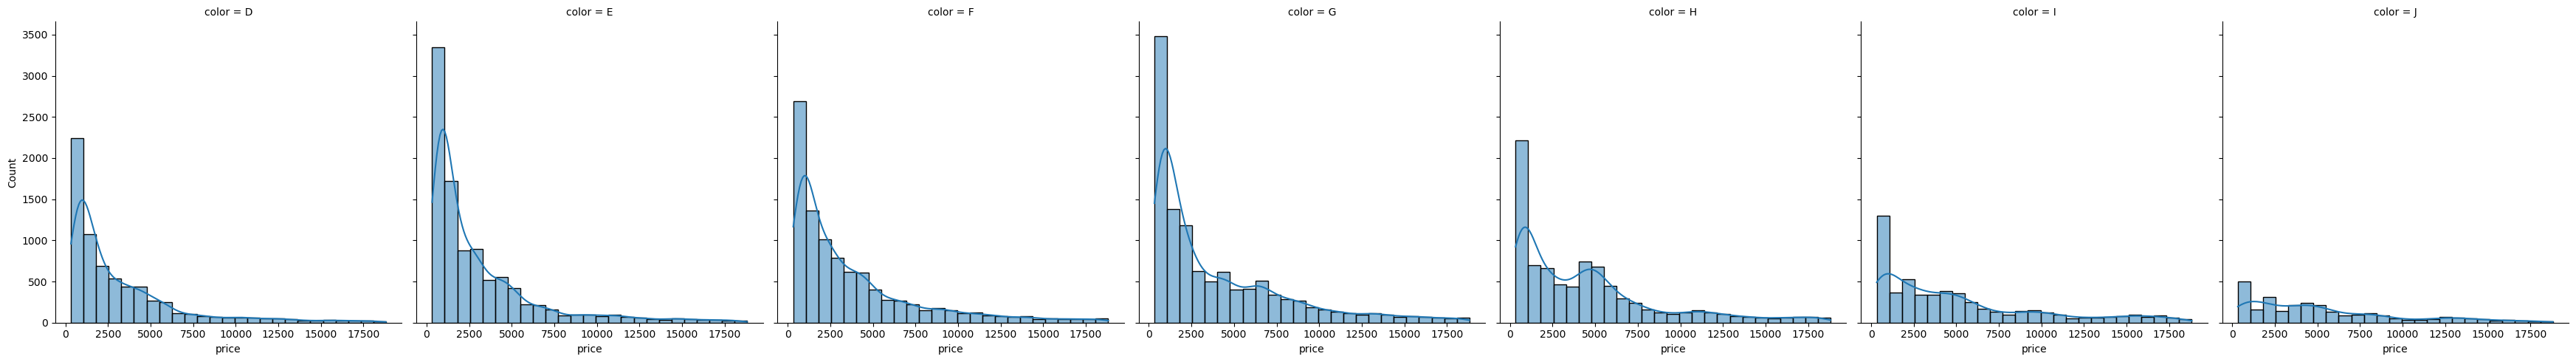

In [21]:
sns.displot(data = diamonds, x='price', col='color', bins=25, kde=True)

plt.show()

By default, **all facets share the `x` and `y` axis bounds!**

Sometimes, we need to MODIFY the bounds to allow them to be NOT SHARED or FREE!

Let's change the y axis bounds to be FREE in the conditional distribution figure.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


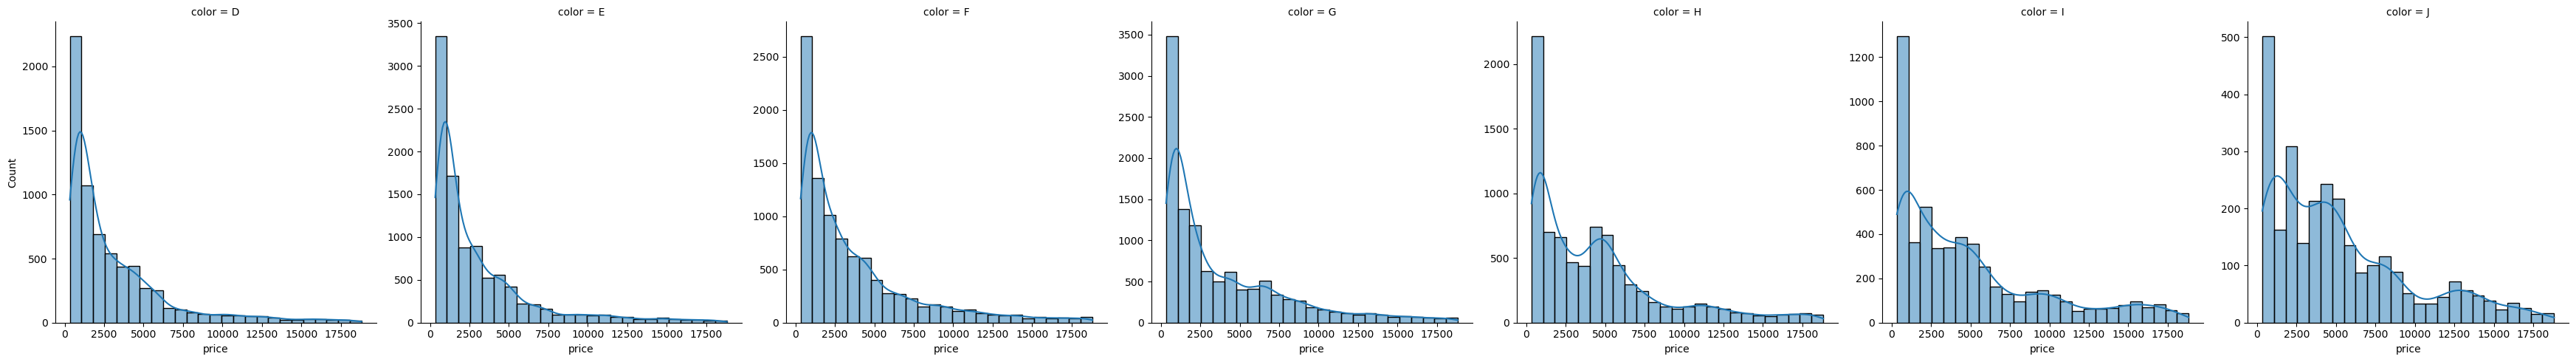

In [22]:
sns.displot(data = diamonds, x='price', col='color', bins=25, kde=True,
           facet_kws={'sharey': False})

plt.show()

What is the consequence of the SKEW or LONG TAIL behavior on the BOXPLOT?

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


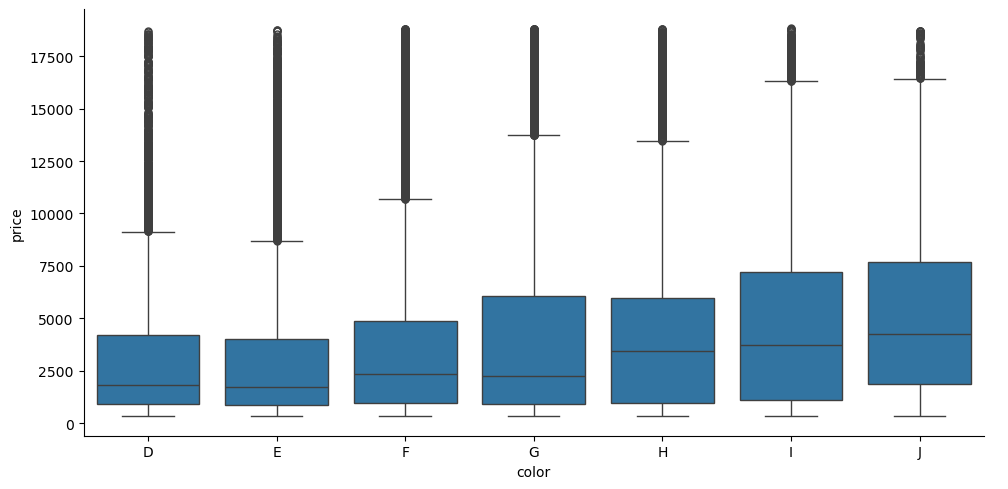

In [23]:
sns.catplot( data = diamonds, x='color', y='price', kind='box', aspect=2)

plt.show()

But... are the MOST FREQUENT values or... are the MOST FREQUENT INTERVALS... contained in the boxes?

**Extremely Skewed distributions** will have the MOST FREQUENT INTERVALS near the LOWER or UPPER bounds!

The boxplot CANNOT represent that behavior because BOXPLOTS CANNOT show the DISTRIBUTION SSHAPE!

We can see the shape with FACETED HISTOGRAMS (KDE plots)... but a draw back of FACETS is we have to look at MANY subplots!

What if used CONDITIONAL KDE plots... with the categorical variable associated with the `hue` argument?

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


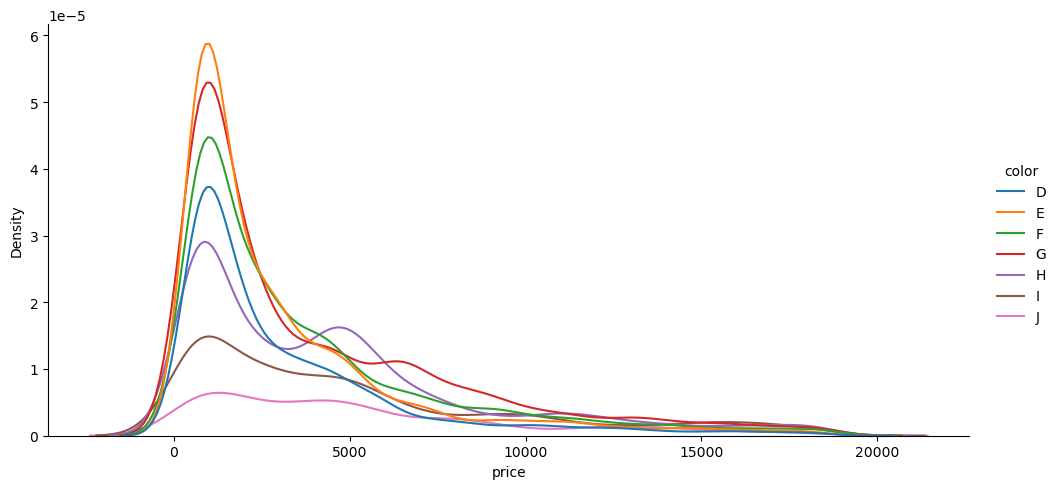

In [24]:
sns.displot(data = diamonds, x='price', hue='color', kind='kde', aspect=2)

plt.show()

Use the `common_norm` function to ignore the sample size default issue!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


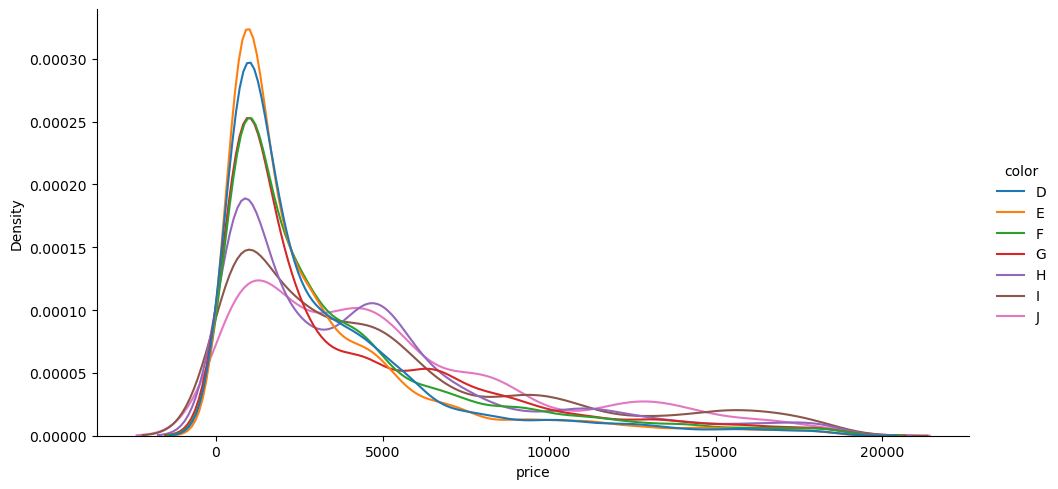

In [25]:
sns.displot(data = diamonds, x='price', hue='color', kind='kde', common_norm=False, aspect=2)

plt.show()

More than *4* categories can cause for VERY BUSY **conditional KDE plots**!

Instead, we can show these side by side like the boxplots where we get the distribution per category, side-by-side on one plot, one figure, and one axis. This avoids overlapping or multiple subplots!

### Violin Plot

The Violin Plot shows CONDITIONAL KDE plots side-by-side within a single **axis** rather than across multiple subplots!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


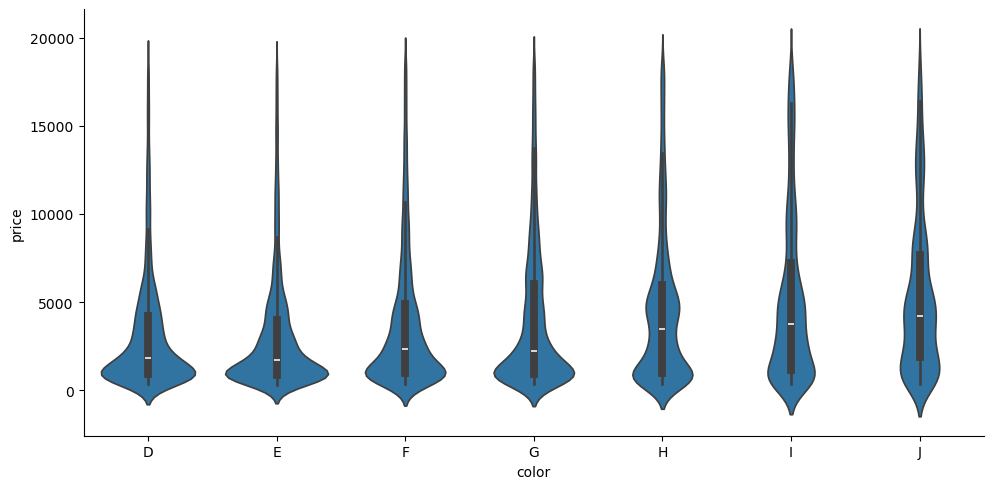

In [26]:
sns.catplot(data=diamonds, x='color', y='price', kind='violin', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


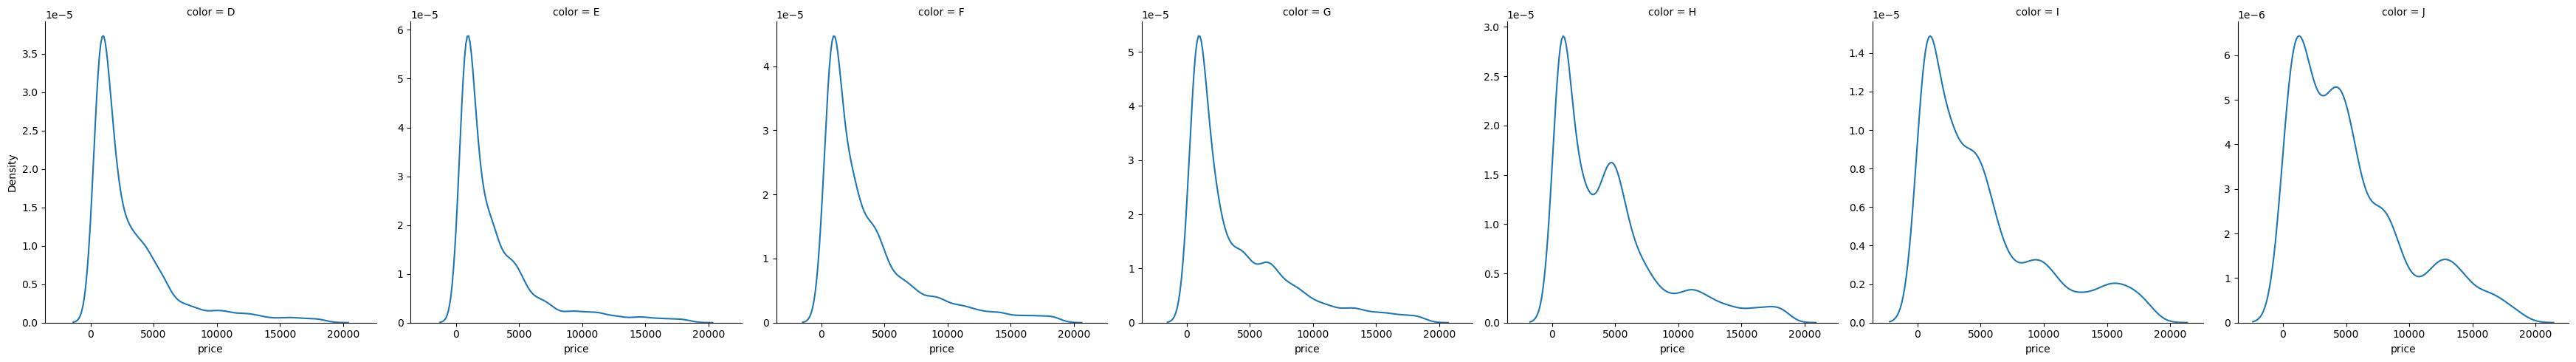

In [28]:
sns.displot(data = diamonds, x='price', col='color', kind='kde',
           facet_kws={'sharey': False})

plt.show()

We can show HORIZONTAL lines for the QUANTILES.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


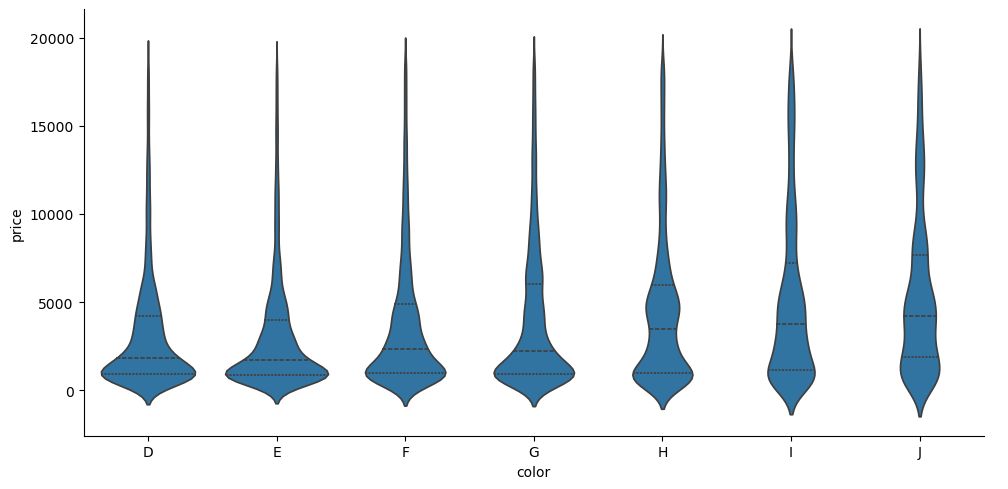

In [29]:
sns.catplot(data = diamonds, x='color', y='price', kind='violin', aspect=2,
            inner='quartile')

plt.show()

In summary:

* Always look at a boxplot to study how the summary statistics CHANGE across categories.
* But, you must **also** look at if the distibutional SHAPE is SYMMETRIC and if the distributional shape CHANGES across categories

  - Use faceted histograms/kde plots
  - Use violin plots

Go back to the GAP MINDER data set.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


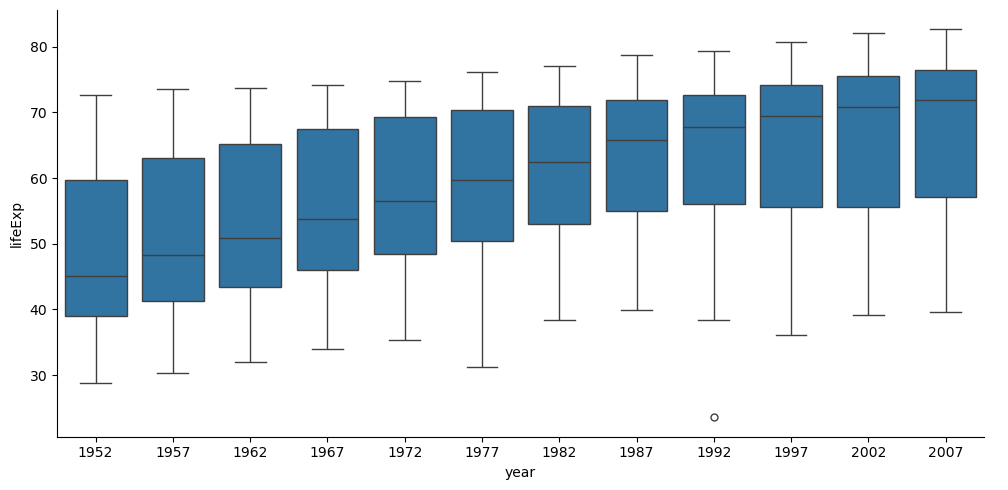

In [30]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='box', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


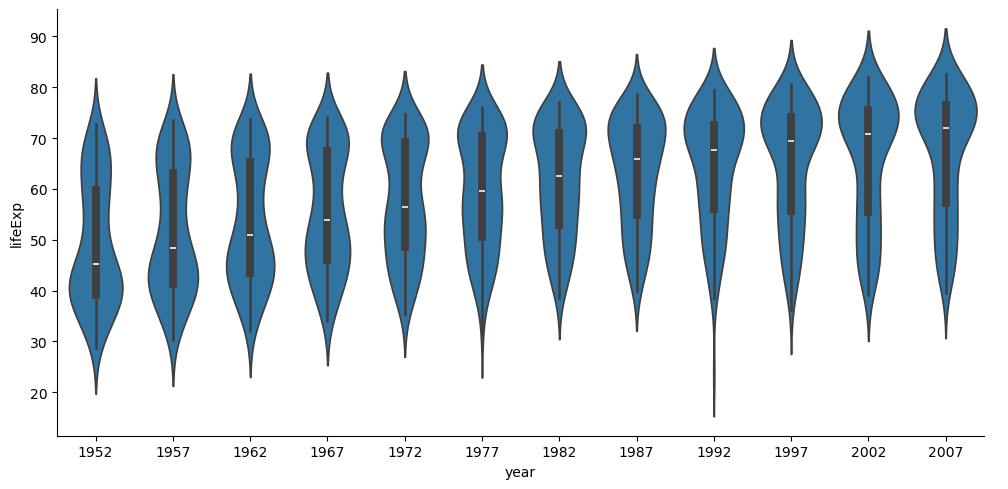

In [32]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='violin', aspect=2)

plt.show()